A lot of this stuff hinges on having the right initial data. We cant run the agents at this moment. I Added the stuff here that was already in workshop 4, but like I said, it will not run.

Personally, I believe that we have to store the eventual data of every script in a csv file. This script needs a program of requirements.

Load Libraries

In [6]:
# !pip install openpyxl

In [64]:
import os
import topogenesis as tg
import pyvista as pv
import trimesh as tm
import pandas as pd
import numpy as np

# convert mesh to pv_mesh
def tri_to_pv(tri_mesh):
    faces = np.pad(tri_mesh.faces, ((0, 0),(1,0)), 'constant', constant_values=3)
    pv_mesh = pv.PolyData(tri_mesh.vertices, faces)
    return pv_mesh

Define Stencil

In [16]:
# creating neighborhood definition
stencil = tg.create_stencil("von_neumann", 1, 1)
# setting the center to zero
stencil.set_index([0,0,0], 0)
print(stencil)

[[[0 0 0]
  [0 1 0]
  [0 0 0]]

 [[0 1 0]
  [1 0 1]
  [0 1 0]]

 [[0 0 0]
  [0 1 0]
  [0 0 0]]]


Define the environment

In [46]:
# loading the lattice from csv
lattice_path = os.path.relpath('../data/meshes/voxelized_envelope_highres.csv')
avail_lattice = tg.lattice_from_csv(lattice_path)
init_avail_lattice = tg.to_lattice(np.copy(avail_lattice), avail_lattice)

context_path = os.path.relpath('../data/meshes/immediate_context.obj')
context_mesh = tm.load(context_path)

load program (insert the program of requirements here)

In [8]:
#loading the relative relations excell

# relative_rels = pd.read_excel('../data/relationships/relative_relations.xlsx', index_col=0) 
# relative_rels_norm = relative_rels.div(relative_rels.sum(axis=1), axis=0)
# relative_rels_norm = relative_rels_norm.fillna(0)

#loading the relative preferences excell
relative_prefs = pd.read_excel('../data/relationships/relative_preferences.xlsx')
relative_prefs.iloc[:, 1:] = relative_prefs.iloc[:, 1:].div(relative_prefs.iloc[:, 1:].sum(axis=1), axis=0)
relative_prefs.iloc[:, 1:] = relative_prefs.iloc[:, 1:].fillna(0)
relative_prefs_norm = relative_prefs

Printing the relative relations

In [7]:
#print(relative_rels_norm)

Printing the relative preferences

In [9]:
print(relative_prefs_norm)

          space_name  facade_connection  sunlight_access  noise_approval  \
0    student_housing           0.208333         0.208333        0.166667   
1       co_cooking_A           0.227273         0.227273        0.113636   
2    assisted_living           0.181818         0.181818        0.163636   
3       co_cooking_B           0.192308         0.192308        0.134615   
4    starter_housing           0.188679         0.188679        0.169811   
5       co_cooking_C           0.200000         0.200000        0.140000   
6         co_working           0.184211         0.263158        0.236842   
7   community_center           0.138889         0.277778        0.138889   
8            library           0.115385         0.230769        0.384615   
9       cinematheque           0.000000         0.000000        0.666667   
10           laundry           0.000000         0.000000        0.000000   
11          fab_labs           0.000000         0.500000        0.166667   
12          

In [10]:
program_prefs = relative_prefs_norm.drop(["space_name", "facade_connection", "penthouse_factor","street_sight"], 1)
program_prefs

,sunlight_access,noise_approval,proximity_to_ground_floor,sky_view_factor,football_proximity
0,0.208333,0.166667,0.000000,0.125000,0.000000
1,0.227273,0.113636,0.000000,0.136364,0.000000
2,0.181818,0.163636,0.181818,0.127273,0.000000
3,0.192308,0.134615,0.192308,0.134615,0.000000
4,0.188679,0.169811,0.000000,0.132075,0.000000
5,0.200000,0.140000,0.000000,0.140000,0.000000
6,0.263158,0.236842,0.105263,0.131579,0.000000
7,0.277778,0.138889,0.166667,0.111111,0.166667
8,0.230769,0.384615,0.192308,0.076923,0.000000
9,0.000000,0.666667,0.333333,0.000000,0.000000


Load the value fields

In [11]:
# loading the lattice from csv
fields = {}
for f in program_prefs.columns:
    lattice_path = os.path.relpath('../data/fields/' + f + '.csv')
    fields[f] = tg.lattice_from_csv(lattice_path)

In [23]:
fields_football=fields["football_proximity"]
fields_sky=fields["sky_view_factor"]
fields_ground=fields["proximity_to_ground_floor"]
fields_noise=fields["noise_approval"]
fields_sun=fields["sunlight_access"]

In [41]:
# t=fields["football_proximity"]**
program_prefs["football_proximity"][0]


0.0

In [58]:
agent_pref_fields=[]
for i in range(0,24):
    int=1
    for f in program_prefs:
        t=fields[f]**program_prefs[f][i]
        int=int*t
    agent_pref_fields.append(int)

In [78]:
l=agent_pref_fields[7]

In [73]:
# lattice_path = os.path.relpath('..\data/fields/football_proximity.csv')
# field_la = tg.lattice_from_csv(lattice_path)

In [83]:
# initiating the plotter
p = pv.Plotter()

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape because we want to inject our values
grid.dimensions = l.shape
# The bottom left corner of the data set
grid.origin = l.minbound
# These are the cell sizes along each axis
grid.spacing = l.unit

# Add the data values to the cell data
grid.point_arrays["Distance"] = l.flatten(order="F")  # Flatten the Lattice

# adding the meshes
p.add_mesh(tri_to_pv(context_mesh), opacity=0.1, style='wireframe')

# adding the volume
opacity = np.array([0,0.6,0.6,0.6,0.6,0.6,0.6]) * 1.5
p.add_volume(grid, cmap="coolwarm", clim=[0, 1.0], opacity=opacity, shade=True, show_scalar_bar=False)

# plotting
p.show(use_ipyvtk=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[(785.6075686833789, 708.1911636833788, 743.2184808333789),
 (65.08283250000001, -12.333572500000002, 22.69374465),
 (0.0, 0.0, 1.0)]

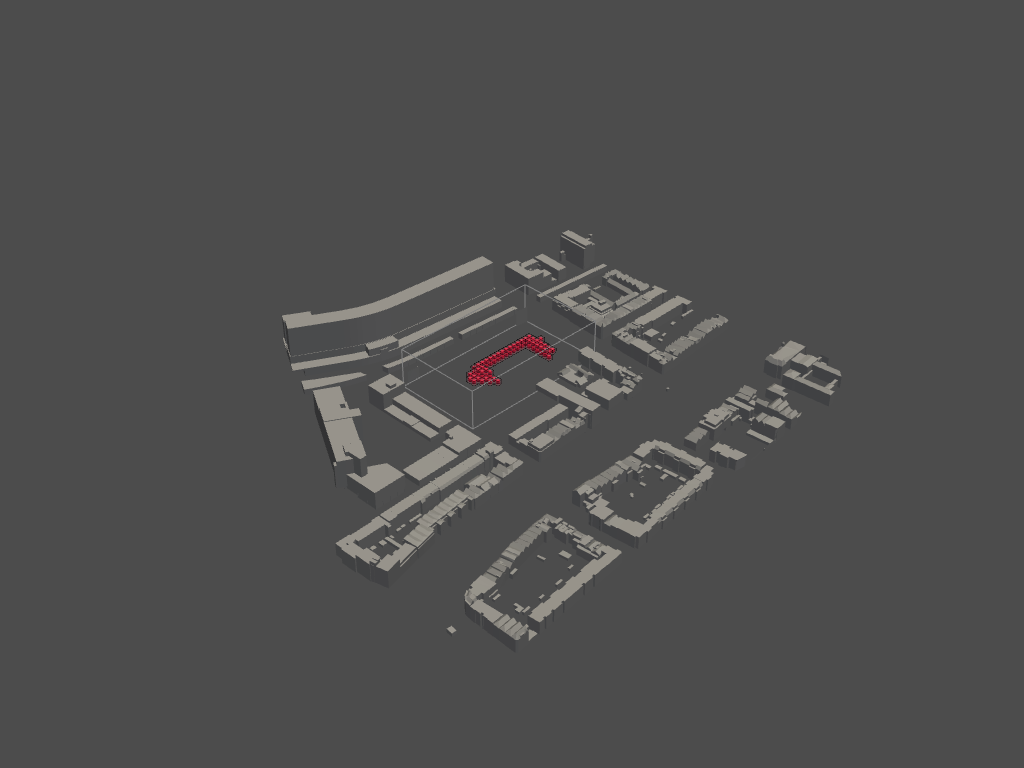

[(785.8088446466429, 708.392439646643, 742.1697567966429),
 (65.08283250000001, -12.333572500000002, 21.44374465),
 (0.0, 0.0, 1.0)]

In [112]:
# defining the shadow envelope lattice with values calcultated in shadowing
r=agent_pref_fields[7]
i=19
# shadowing treshold
preferance_threshold = (1-i/100) # number is subject to change

# removing values above set threshold and setting them to zero
new_agent_pref_field = np.where(r < preferance_threshold,0,r)

# set all usable values to 1

pref_lattice = np.where(new_agent_pref_field > 0, 1,new_agent_pref_field)
pref_lattice = pref_lattice.astype(bool)
pref_lattice = tg.to_lattice(pref_lattice, r)
pref_lattice.shape

# initiating the plotter
p = pv.Plotter()

# fast visualization of the lattice
pref_lattice.fast_vis(p)

# adding the meshes
p.add_mesh(tri_to_pv(context_mesh), color='#aaaaaa')

# plotting
p.show()

In [114]:
# defining the shadow envelope lattice with values calcultated in shadowing
r=agent_pref_fields[7]
frames=[]
#i=19
for i in range(0,100):# shadowing treshold
    preferance_threshold = (1-i/100) # number is subject to change

    new_agent_pref_field = np.where(r < preferance_threshold,0,r)

    pref_lattice = np.where(new_agent_pref_field > 0, 1,new_agent_pref_field)
    pref_lattice = pref_lattice.astype(bool)
    pref_lattice = tg.to_lattice(pref_lattice, r)
    
    frames.append(pref_lattice)

topogenesis.datastructures.datastructures.lattice

In [105]:

# r=agent_pref_fields[7]
# frames = [r]
# # setting the time variable to 0
# t = 0
# n_frames = 100
# # main feedback loop of the simulation (for each time step ...)
# while t<n_frames:
#     for i in range(0,100):
    
#         # shadowing treshold
#         preferance_threshold = i/10 # number is subject to change

#         # removing values above set threshold and setting them to zero
#         new_agent_pref_field = np.where(r < preferance_threshold,0,r)

#         # set all usable values to 1

#         pref_lattice = np.where(new_agent_pref_field > 0, 1,new_agent_pref_field)
#         pref_lattice = pref_lattice.astype(bool)
#         pref_lattice = tg.to_lattice(pref_lattice, r)
#         frames.append(pref_lattice)
    
#     # # constructing the new lattice
#     # new_occ_lattice = tg.to_lattice(np.copy(occ_lattice), occ_lattice)
#     # # adding the new lattice to the list of frames
#     # frames.append(pref_lattice)
#     # adding one to the time counter
    t += 1

In [107]:
# p = pv.Plotter(notebook=True)

# base_lattice = frames[0]

# # Set the grid dimensions: shape + 1 because we want to inject our values on the CELL data
# grid = pv.UniformGrid()
# grid.dimensions = np.array(base_lattice.shape) + 1
# # The bottom left corner of the data set
# grid.origin = base_lattice.minbound - base_lattice.unit * 0.5
# # These are the cell sizes along each axis
# grid.spacing = base_lattice.unit 

# # adding the boundingbox wireframe
# p.add_mesh(grid.outline(), color="grey", label="Domain")

# # adding the availability lattice
# # init_avail_lattice.fast_vis(p)

# # adding axes
# p.add_axes()
# p.show_bounds(grid="back", location="back", color="#aaaaaa")

# def create_mesh(value):
#     f = int(value)
#     lattice = frames[f]

#     # Add the data values to the cell data
#     grid.cell_arrays["Agents"] = lattice.flatten(order="F").astype(int)  # Flatten the array!
#     # filtering the voxels
#     threshed = grid.threshold([-0.1, 1])
#     # adding the voxels
#     p.add_mesh(threshed, name='sphere', show_edges=True, opacity=1.0, show_scalar_bar=False)

#     return

# p.add_slider_widget(create_mesh, [0, n_frames], title='Time', value=0, event_type="always", style="classic")
# p.show(use_ipyvtk=True)